# Introduction to BlenderProc

Note: This notebook makes use of the basic example which is available under `examples/basic`

In this notebook, we will see how can we quickly set up the BlenderProc environment inside Google Colab and how can we generate photorealistic data which can later be used for many different applications.

We firstly clone the official BlenderProc repo (repository) from GitHub using Git

In [1]:
# git clone the BlenderProc repo
!git clone https://github.com/DLR-RM/BlenderProc.git

fatal: destination path 'BlenderProc' already exists and is not an empty directory.


We change our present working directory to the BlenderProc repo

In [2]:
 # change directory to BlenderProc
 %cd "BlenderProc"

/content/BlenderProc


We view the present working directory to make sure we are inside the BlenderProc repo

In [3]:
# present working directory 
!pwd

/content/BlenderProc


In order to run BlenderProc inside Google Colab, we first have to update the `LD_PRELOAD` environment variable

In [4]:
import os

# updating the LD_PRELOAD env variable
os.environ["LD_PRELOAD"] = "/usr/lib/x86_64-linux-gnu/libtcmalloc_minimal.so.4.3.0"

Then, we update the `blender_install_path` config variable in the `config.yaml` file inside the basic example. The reason for making this change is that we want to specify the custom Blender install path as an argument in the next step. 

In [5]:
import yaml

# load the basic example config file
with open("examples/basics/basic/config.yaml", "r") as f:
  config = yaml.safe_load(f)

# update the "blender_install_path" variable with the correct Blender installation path 
config["setup"]["blender_install_path"] = "<args:3>"

# write the basic example config file after making the change
with open("examples/basics/basic/config.yaml", "w") as f:
  yaml.dump(config, f)

Finally, we run the BlenderProc program using the `run.py` file along with required command line arguments. The first argument specifies the location of the YAML config file. The second argument corresponds to the camera pose file. In this case, we have specified two camera poses in the `examples/basics/basic/camera_positions` file. The third argument correponds to the output directory where our generated data will be stored. The fourth argument corresponds to the custom Blender install path which will be installed in the current directory by the `run.py` file.

In [6]:
# run the BlenderProc basic example
!python run.py examples/basics/basic/config.yaml examples/resources/camera_positions examples/resources/scene.obj examples/basics/basic/output ./

Parsing config 'examples/basic/config.yaml'
Filling placeholder <args:2> at modules/(main.Initializer)/config/global/output_dir: examples/basic/output
Filling placeholder <args:1> at modules/(loader.ObjectLoader)/config/path: examples/basic/scene.obj
Filling placeholder <args:0> at modules/(camera.CameraLoader)/config/path: examples/basic/camera_positions
Filling placeholder <args:3> at setup/blender_install_path: ./
Successfully finished parsing 
Using blender in ./blender-2.91.0-linux64
Looking in links: /tmp/tmp41gk1gta
distutils: /content/BlenderProc/blender-2.91.0-linux64/2.91/python/include/python3.7m/UNKNOWN
sysconfig: /content/BlenderProc/blender-2.91.0-linux64/2.91/python/include/python3.7m
user = False
home = None
root = None
prefix = None
distutils: /content/BlenderProc/blender-2.91.0-linux64/2.91/python/include/python3.7m/UNKNOWN
sysconfig: /content/BlenderProc/blender-2.91.0-linux64/2.91/python/include/python3.7m
user = False
home = None
root = None
prefix = None
pyyaml:5.

We visualize the first rendered color, depth and normal image which corresponds to the `0.hdf5` file inside the `examples/basics/basic/output` folder

examples/basic/output/0.hdf5 contains the following keys: <KeysViewHDF5 ['blender_proc_version', 'colors', 'colors_version', 'distance', 'distance_version', 'normals', 'normals_version']>


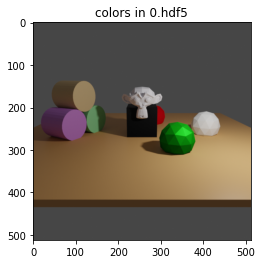

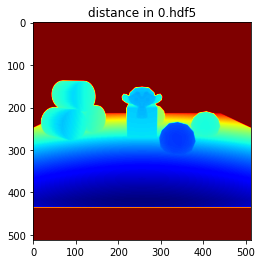

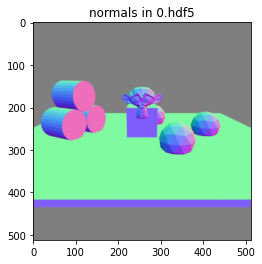

In [7]:
# visualize the generated data (0.hdf5)
%run "scripts/visHdf5Files.py" "examples/basics/basic/output/0.hdf5"

We visualize the second rendered color, depth and normal image which corresponds to the `1.hdf5` file inside the `examples/basics/basic/output` folder

examples/basic/output/1.hdf5 contains the following keys: <KeysViewHDF5 ['blender_proc_version', 'colors', 'colors_version', 'distance', 'distance_version', 'normals', 'normals_version']>


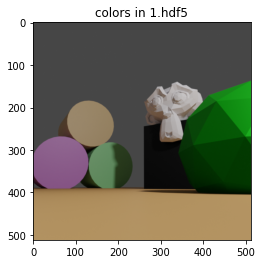

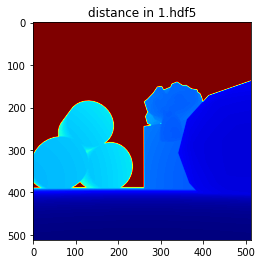

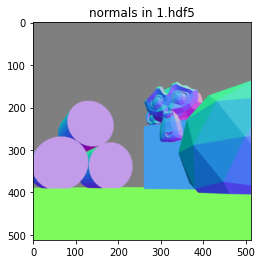

In [8]:
# visualize the generated data (1.hdf5)
%run "scripts/visHdf5Files.py" "examples/basics/basic/output/1.hdf5"